<a href="https://colab.research.google.com/github/shivam92211/NLP-Projects/blob/main/WhatsApp_Chat_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
! pip install emoji

In [47]:
import re
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [48]:
import pandas as pd

# Read the text file line by line
with open('WhatsAppChat.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Initialize empty lists to store data
dates = []
times = []
senders = []
messages = []

# Iterate through the lines and extract information
for line in lines:
    line = line.strip()

    # Split the line based on the first occurrence of " - "
    parts = line.split(' - ', 1)
    if len(parts) == 2:
        datetime_part, message_part = parts
        datetime_parts = datetime_part.split(', ')
        if len(datetime_parts) == 2:
            date, time = datetime_parts
            dates.append(date)
            times.append(time)

            # Split sender and message if available
            if ':' in message_part:
                sender, message = message_part.split(': ', 1)
                senders.append(sender)
                messages.append(message)
            else:
                # If no sender, consider the whole line as a message
                senders.append(None)
                messages.append(message_part)
        else:
            # Handle lines without a proper date and time
            dates.append(None)
            times.append(None)
            senders.append(None)
            messages.append(line)
    else:
        # Handle lines without a proper date-time separator
        dates.append(None)
        times.append(None)
        senders.append(None)
        messages.append(line)

# Create a DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Time': times,
    'Author': senders,
    'Message': messages
})



In [49]:
df.tail(10)

,Date,Time,Author,Message
1022,17/09/23,3:15 pm,Abhishek Mestry,Aur shivam tujhe bola tha naa ki Parallettes b...
1023,17/09/23,3:16 pm,Abhishek Mestry,Kya Kiya ki nhai
1024,17/09/23,4:49 pm,Abhishek Mestry,??
1025,17/09/23,4:49 pm,Abhishek Mestry,Kuch bolo
1026,18/09/23,9:37 pm,Abhishek Mestry,Shivam banaya ki nahi
1027,18/09/23,9:38 pm,Abhishek Mestry,Parallettes
1028,18/09/23,9:38 pm,Abhishek Mestry,Bolaa tha naa
1029,18/09/23,9:38 pm,Abhishek Mestry,Naya design kaa
1030,18/09/23,9:39 pm,Abhishek Mestry,Ek order aayaa hai
1031,18/09/23,9:39 pm,Abhishek Mestry,Jumbo Parallettes kaa


In [65]:
df['Author'].unique()

array([None, 'Shivam', 'Abhishek Mestry', 'Ankesh Sharma 2'], dtype=object)

In [53]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)

135


In [54]:
def split_count(text):

    emoji_list = []
    data = re.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

In [57]:
import pandas as pd
import re



# Define a custom function to detect emojis based on Unicode code points
def split_count(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # Emojis in the first emoji block
        u"\U0001F300-\U0001F5FF"  # Additional symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & map symbols
        u"\U0001F700-\U0001F77F"  # Alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric shapes
        u"\U0001F800-\U0001F8FF"  # Supplemental arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental symbols and pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and pictographs for astrology
        u"\U0001FB00-\U0001FBFF"  # Symbols for legacy computing
        u"\U0001FC00-\U0001FCFF"  # Optional symbol
        u"\U0001F004-\U0001F0CF"  # Mahjong tiles
        u"\U0001F170-\U0001F251"  # Enclosed ideographic supplement
        "]+", flags=re.UNICODE)
    emoji_list = emoji_pattern.findall(text)
    return emoji_list

df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
print(emojis)


68


In [62]:
total_messages = df['Message'].count()

In [63]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
print("Data science Community")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

Data science Community
Messages: 1032
Media: 135
Emojis: 68
Links: 30


In [64]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df.info()
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897 entries, 0 to 1031
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      861 non-null    object
 1   Time      861 non-null    object
 2   Author    845 non-null    object
 3   Message   897 non-null    object
 4   emoji     897 non-null    object
 5   urlcount  897 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 49.1+ KB


In [66]:
l = ['Shivam', 'Abhishek Mestry', 'Ankesh Sharma 2']
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])
  print('Links Sent', links)
  print()

Stats of Shivam -
Messages Sent 123
Words per message 4.138211382113822
Media Messages Sent 28
Emojis Sent 3
Links Sent 18

Stats of Abhishek Mestry -
Messages Sent 472
Words per message 5.97457627118644
Media Messages Sent 51
Emojis Sent 12
Links Sent 9

Stats of Ankesh Sharma 2 -
Messages Sent 250
Words per message 3.976
Media Messages Sent 56
Emojis Sent 38
Links Sent 3



In [67]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

('👍', 14)
('🤣🤣', 4)
('🪵💹📇', 3)
('🏋', 3)
('🧘', 3)
('😒', 3)
('👌', 3)
('😅', 3)
('😂', 2)
('😂😂', 2)
('🤣🤣🤣', 2)
('😄', 2)
('🎉', 2)
('😲', 1)
('🤦', 1)
('🤣', 1)
('🙏🙏🙏', 1)
('🧐', 1)
('👎', 1)
('😆', 1)
('🥲', 1)
('🖕', 1)
('😐', 1)
('🤦🤦🤦', 1)
('🤑🤑', 1)
('😅🤣', 1)
('🤐', 1)
('🤸', 1)
('🥇', 1)
('🥈', 1)
('📈', 1)
('🤩', 1)
('💪💯', 1)
('👏👏👏👏👏👏👏', 1)
('😎', 1)


There are 25596 words in all the messages.


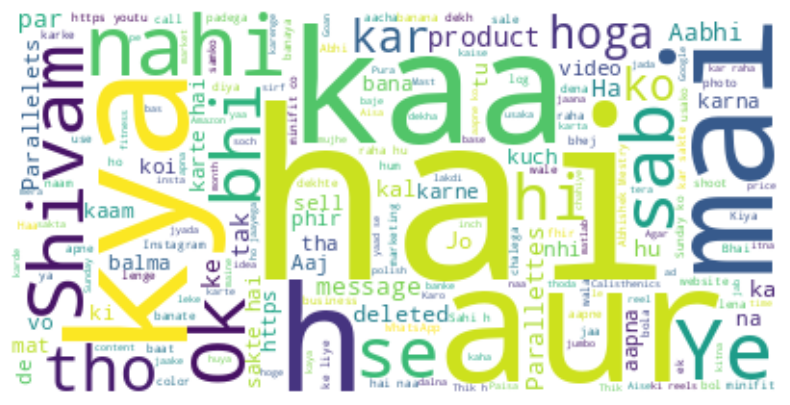

In [68]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Shivam


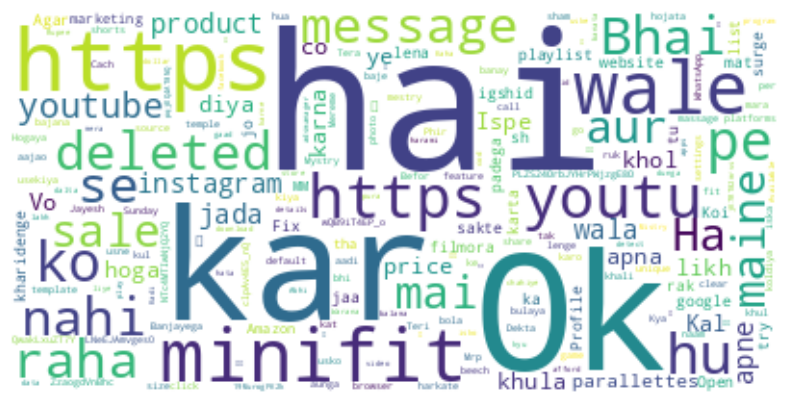

Author name Abhishek Mestry


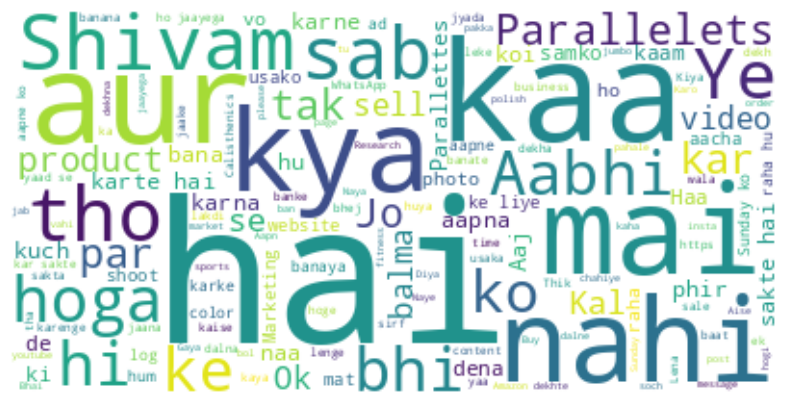

Author name Ankesh Sharma 2


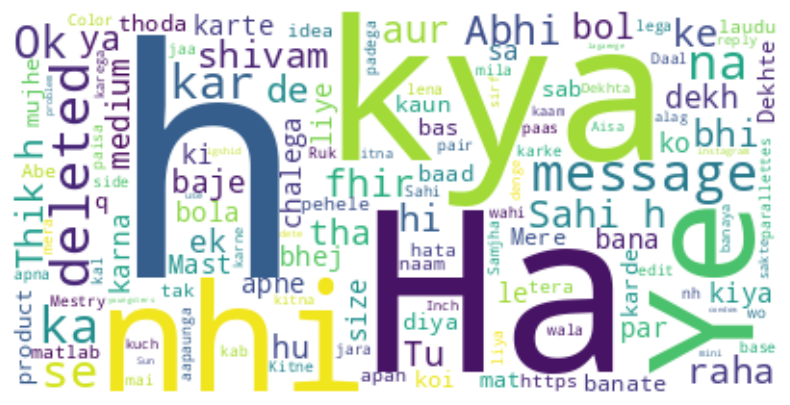

In [69]:
l = ['Shivam', 'Abhishek Mestry', 'Ankesh Sharma 2']
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()